In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm

In [42]:
from sklearn.utils import resample

def generate_uniform(N):
    return np.random.uniform(-1,1,N)

def generate_3uniform(N):
    return np.random.uniform(-1,1,N) + np.random.uniform(-1,1,N) + np.random.uniform(-1,1,N)

def generate_cauchy(N):
    return np.random.standard_cauchy(N)

def generate_normal(N):
    return np.random.normal(0, 1, int(N))

def get_mad(data):
    median = np.median(data)
    deviations = np.abs(data - median)
    mad = np.median(deviations)
    return mad

def get_y(data):
    return sorted(np.abs(data - np.median(data)))

def get_y12(data, x1, x2):
    return (sorted(np.minimum(np.abs(data-x1), np.abs(data-x2))), sorted(np.maximum(np.abs(data-x1), np.abs(data-x2))))

def plot_intervals(type_interval, func_generate, mad, q=0.95, p=0.5):
    N = 10
    n_values = []
    all_l, all_r = [], []
    z_critical = stats.norm.ppf((1+q)/2)

    for i in tqdm(range(6)):
        cur_l, cur_r = [], []
        N = int(N)

        n_iterations = 1000 
        mad_values = []

        data = func_generate(N)
        for i in range(n_iterations):
            sample = resample(data) 
            mad_value = get_mad(sample) 
            mad_values.append(mad_value)

        mad_se = np.std(mad_values)
        
        for j in range(10000):
            data = func_generate(N)
            data.sort()
    
            if type_interval == 'mad_asympt':
                l, r = (mad - mad_se * z_critical, mad + mad_se * z_critical)

            elif type_interval == 'mad_approximation1':
                l, r = (N*p - np.sqrt(N*p*(1-p)) * z_critical, N*p + np.sqrt(N*p*(1-p)) * z_critical)
                y = get_y(data)
                l, r = (y[max(0, int(l))], y[min(int(r)+1, N-1)])
            elif type_interval == 'mad_approximation2':
                l, r = (N*p - np.sqrt(N*p*(1-p)) * z_critical, N*p + np.sqrt(N*p*(1-p)) * z_critical)
                k1, k2 = (data[max(0, math.floor(l))], data[min(math.ceil(r), N-1)])
                y1, y2 = get_y12(data, k1, k2)
                l, r = (y1[max(0, math.floor(l))], y2[min(math.ceil(r), N-1)])
            
            cur_l.append(l)
            cur_r.append(r)

            if type_interval == 'median_analytical':
                break
        
        n_values.append(N)
        all_l.append(np.mean(cur_l))
        all_r.append(np.mean(cur_r))
        if i % 2 == 0:
            N *= 5
        else:
            N *= 2
    return [n_values, all_l, all_r]

In [81]:
def sample_size_one_plot(n_values, uni, uni3, norm):
    plt.plot(n_values, uni3, marker='s', label='sum of 3 uniform',  linestyle='-')
    plt.plot(n_values, norm, marker='^', label = 'normal', linestyle=':')
    plt.plot(n_values, uni, marker='o', label='uniform', linestyle='--')
    plt.xscale('log')
    plt.legend()
    plt.xlabel('lamda_dop')
    plt.ylabel('Размер выборки')
    plt.title('Достаточность размера выборки')
    plt.grid(True)
    plt.show()

# 1

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ci(sample_sizes, lower_bounds, upper_bounds, mad_value, name_dist):
    for i in range(len(sample_sizes)):
        plt.plot([sample_sizes[i], sample_sizes[i]], [lower_bounds[i], upper_bounds[i]], color='blue', marker='o')

    plt.axhline(y=mad_value, color='red', linestyle='--', label='MAD')
    plt.xscale('log')
    plt.xlabel('Размер выборки')
    plt.ylabel('Границы доверительного интервала')
    plt.title('Доверительные интервалы для ' + name_dist)
    plt.legend()

    plt.grid(True)
    plt.show()

In [4]:
mad_uniform = get_mad(generate_uniform(10000000))
mad_3uniform = get_mad(generate_3uniform(10000000))
mad_normal = get_mad(generate_normal(10000000))

In [5]:
mad_uniform, mad_3uniform, mad_normal

(0.4995738084699264, 0.7056729295540949, 0.6740585030731193)

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.92it/s]


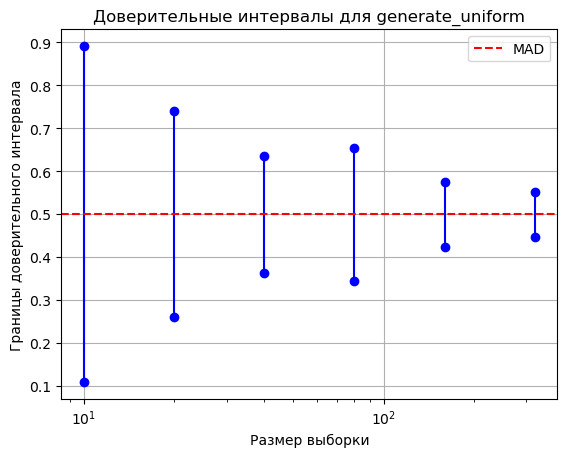

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.32it/s]


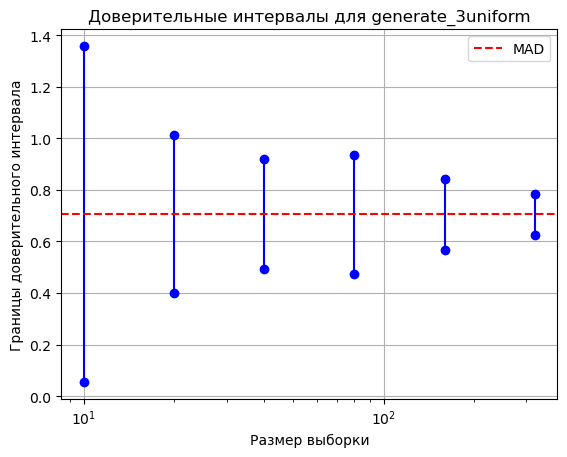

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.75it/s]


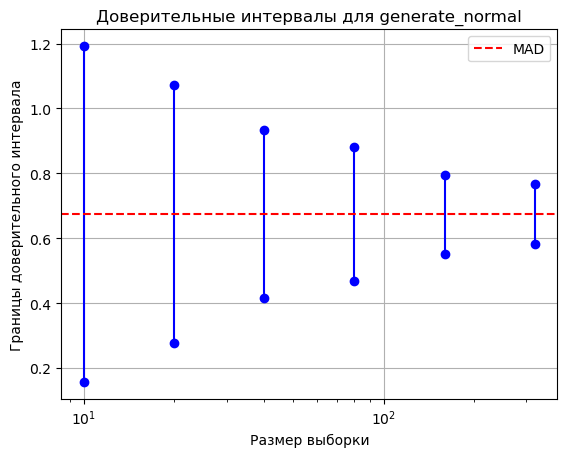

In [86]:
plot_args_l, plot_args_r = [], []
plot_time_approx = []
dists = [generate_uniform, generate_3uniform, generate_normal]
mads = [mad_uniform, mad_3uniform, mad_normal]
for i in range(3):
    n_values, l_cur, r_cur = plot_intervals('mad_asympt', dists[i], mads[i])
    plot_ci(n_values, l_cur, r_cur, mads[i], dists[i].__name__)

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.86it/s]


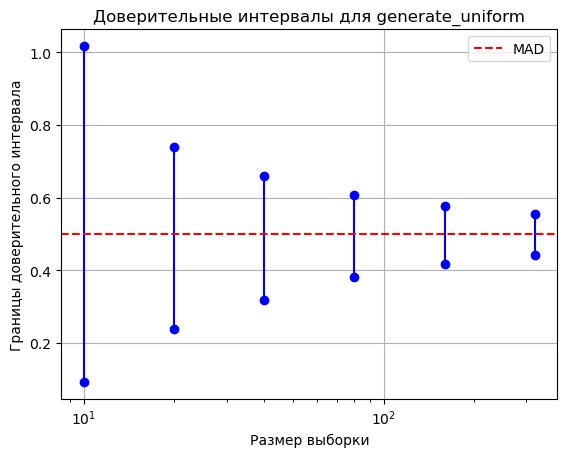

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.36it/s]


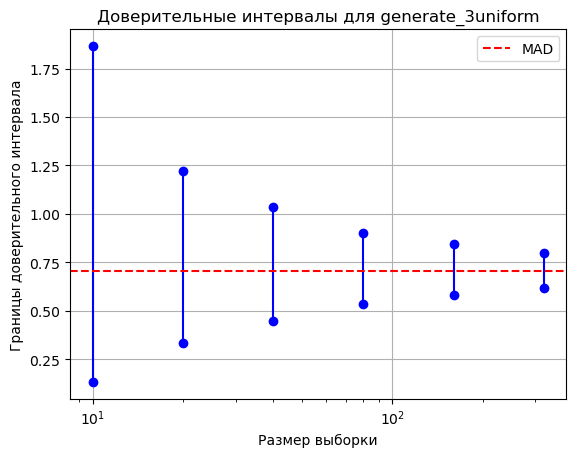

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.89it/s]


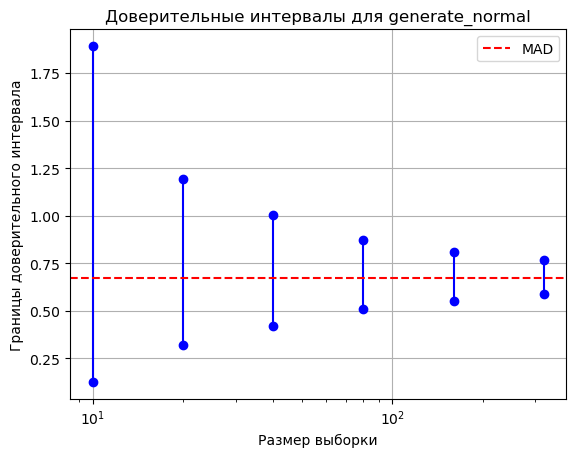

In [87]:
plot_args_l, plot_args_r = [], []
plot_time_approx = []
dists = [generate_uniform, generate_3uniform, generate_normal]
mads = [mad_uniform, mad_3uniform, mad_normal]
for i in range(3):
    n_values, l_cur, r_cur = plot_intervals('mad_approximation1', dists[i], mads[i])
    plot_ci(n_values, l_cur, r_cur, mads[i], dists[i].__name__)

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.63it/s]


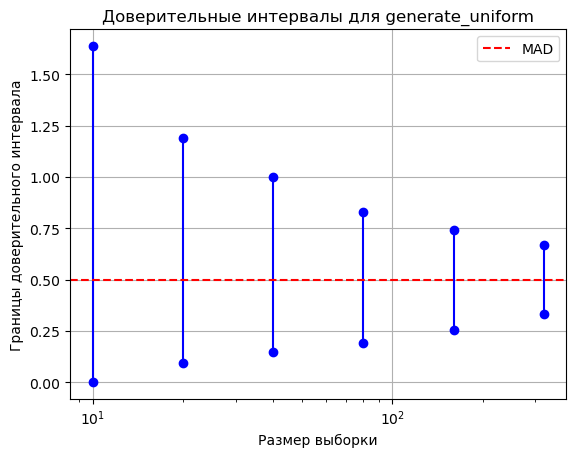

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.38it/s]


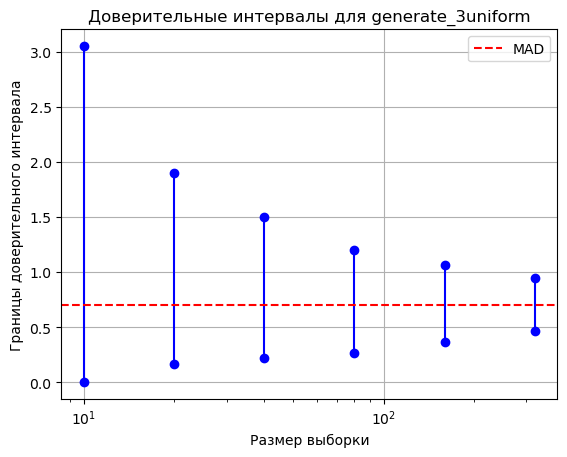

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.64it/s]


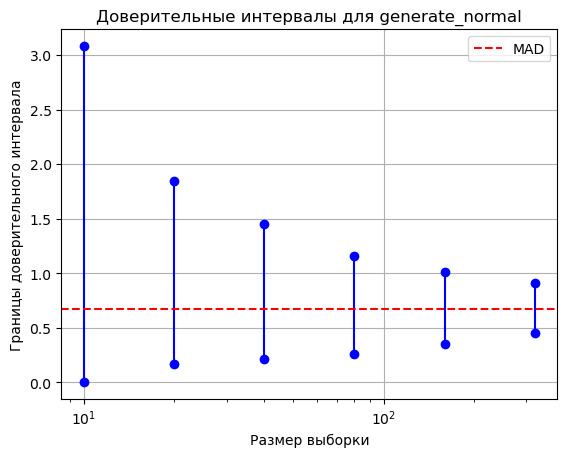

In [88]:
plot_args_l, plot_args_r = [], []
plot_time_approx = []
dists = [generate_uniform, generate_3uniform, generate_normal]
mads = [mad_uniform, mad_3uniform, mad_normal]
for i in range(3):
    n_values, l_cur, r_cur = plot_intervals('mad_approximation2', dists[i], mads[i])
    plot_ci(n_values, l_cur, r_cur, mads[i], dists[i].__name__)

# 2

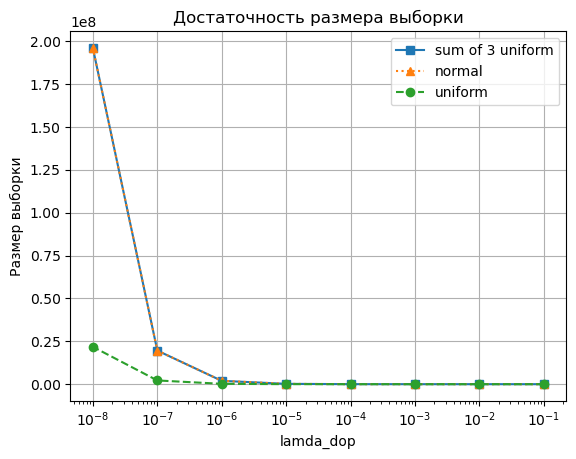

In [82]:
dists = ['uniform', '3uniform', 'normal']
q = 0.95
z_critical = stats.norm.ppf((1+q)/2)
lamdas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
sizes = []
for i in range(3):
    std_dev = 1
    if dists[i] == 'uniform':
        std_dev = 1/3
    cur_n = []
    for lamda in lamdas:
        cur_n.append(std_dev**2 * z_critical / lamda)
    sizes.append(cur_n)
sample_size_one_plot(lamdas, *sizes)

# 3

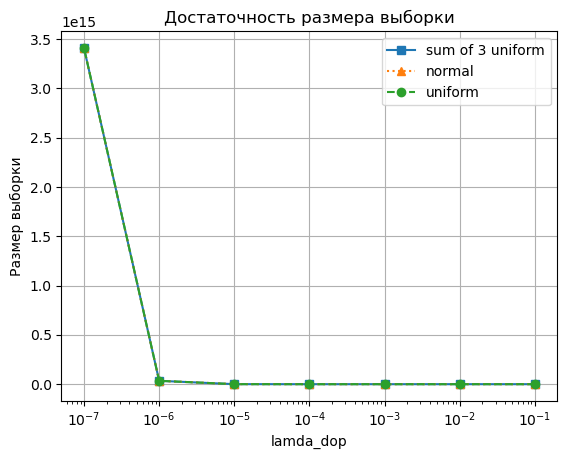

In [83]:
# 3.2 - upper bound
n_min = 5
dists = [generate_uniform, generate_normal, generate_3uniform]
q = 0.95
lamdas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
sizes = []
for i in range(3):
    n_min = 5
    data = dists[i](n_min)
    sample_variance = np.var(data, ddof=1)
    cur_n = []
    for lamda in lamdas:
        for _ in range(2):
            lower_bound_variance = np.sqrt(sample_variance * (n_min-1) / stats.chi2.ppf((1+q)/2, n_min-1))
            n_min = int((upper_bound_variance * stats.t.ppf((1+q)/2, n_min) / lamda)**2)
        cur_n.append((upper_bound_variance * stats.t.ppf((1+q)/2, n_min) / lamda)**2)
    sizes.append(cur_n)
sample_size_one_plot(lamdas, *sizes)

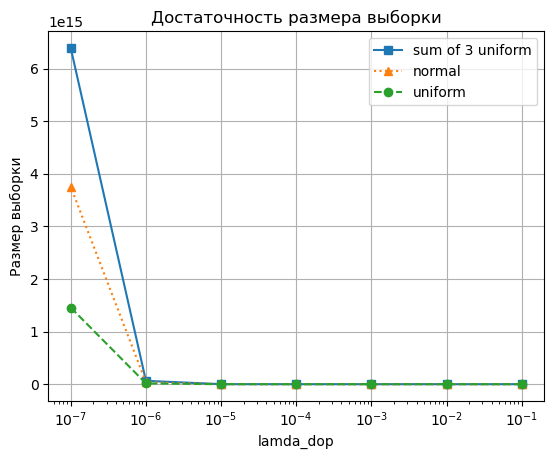

In [84]:
# 3.2 - upper bound
n_min = 5
dists = [generate_uniform, generate_3uniform, generate_normal]
q = 0.95
lamdas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
sizes = []
for i in range(3):
    data = dists[i](n_min)
    sample_variance = np.var(data, ddof=1)
    cur_n = []
    for lamda in lamdas:
        upper_bound_variance = np.sqrt(sample_variance * (n_min-1) / stats.chi2.ppf((1-q)/2, n_min-1))
        cur_n.append((upper_bound_variance * stats.t.ppf((1+q)/2, n_min) / lamda)**2)
    sizes.append(cur_n)
sample_size_one_plot(lamdas, *sizes)